### Importing libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [37]:
data = pd.read_csv("diabetes.csv")

In [38]:
data.shape

(768, 9)

In [39]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
# check if any null value is present
data.isnull().values.any()

np.False_

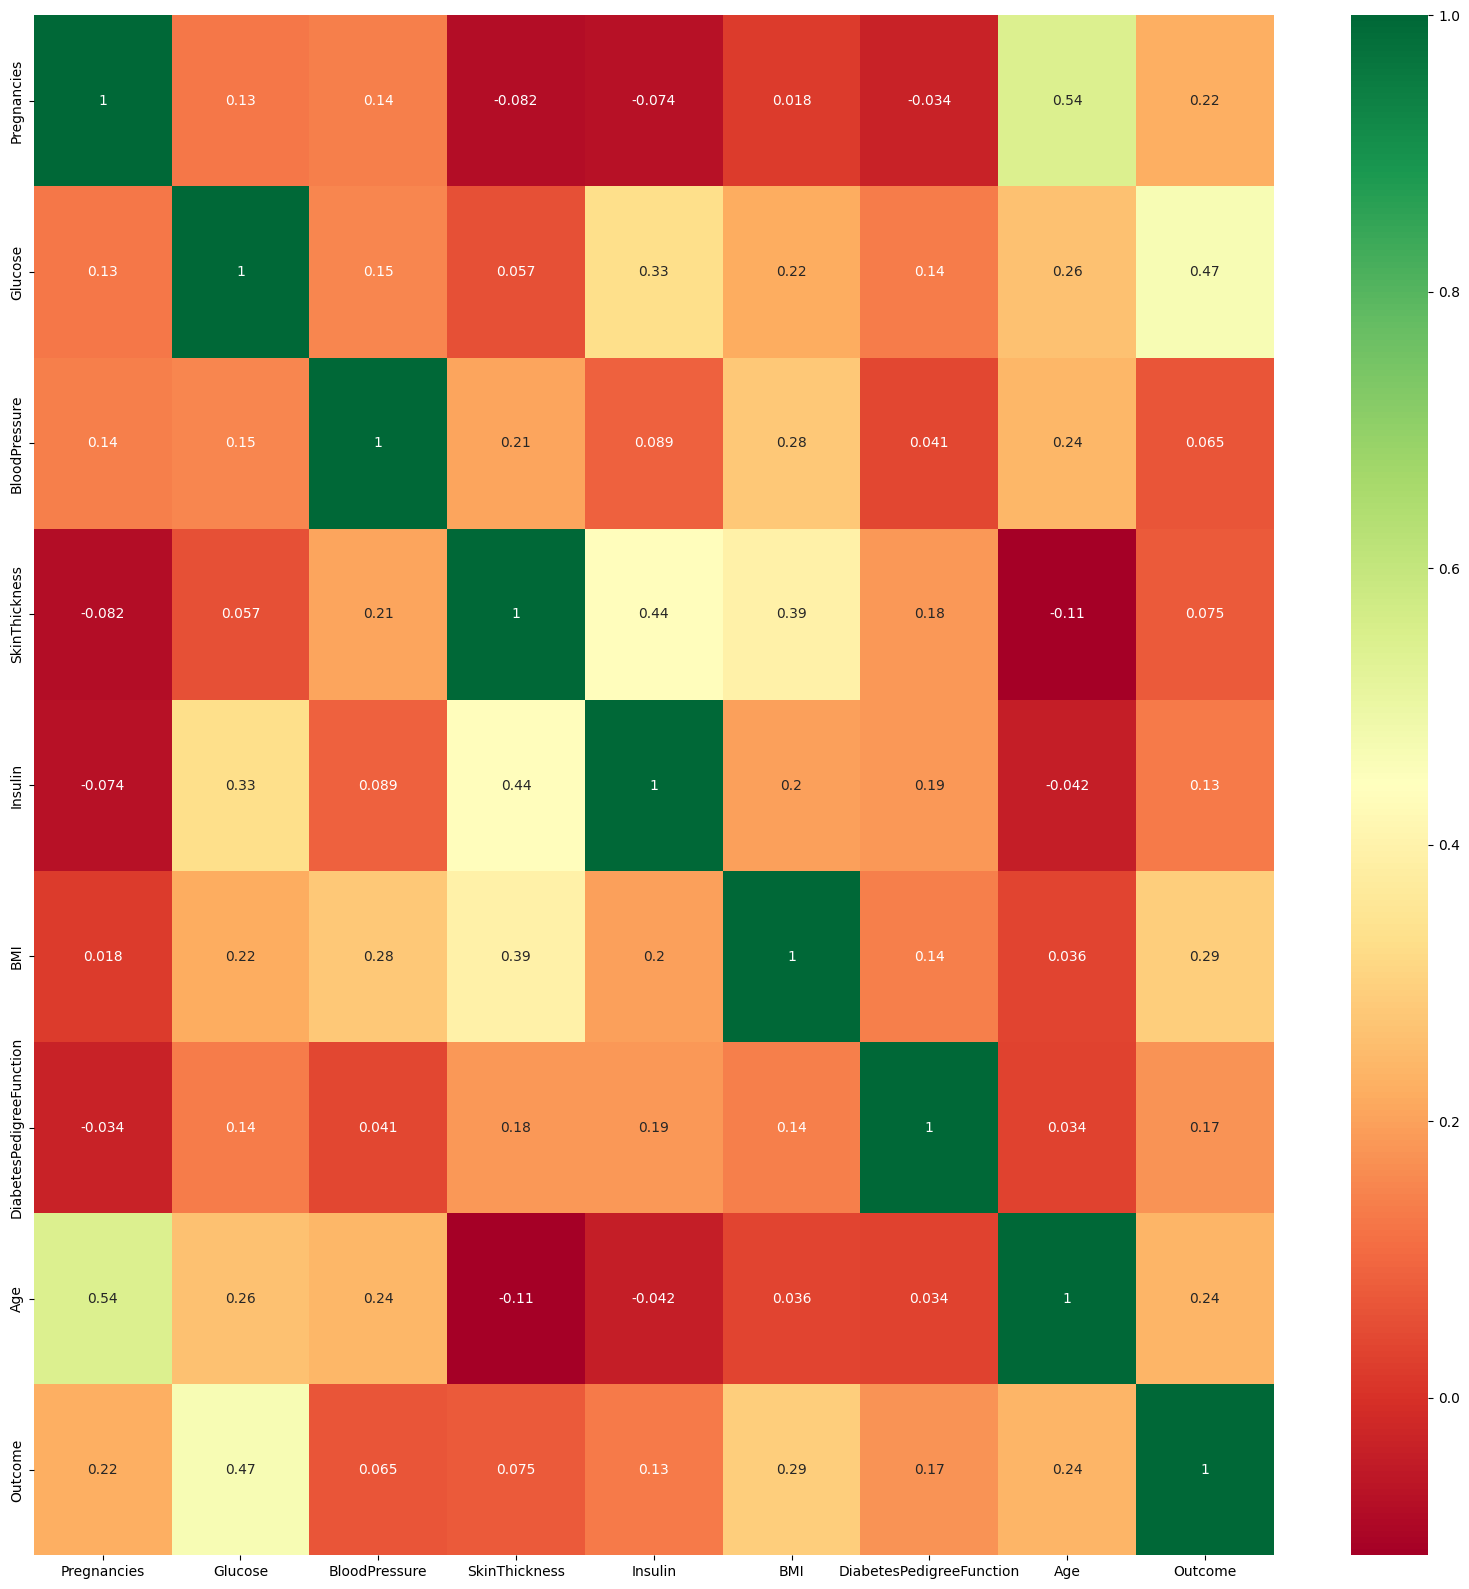

In [41]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [42]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Changing the diabetes column data from boolean to number

In [43]:
diabetes_map = {True: 1, False: 0}

In [44]:
data['diabetes'] = data['Outcome'].map(diabetes_map)

In [45]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN


In [46]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [47]:
(diabetes_true_count,diabetes_false_count)

(0, 0)

In [48]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
predicted_class = ['diabetes']

In [49]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

## Check how many other missing(zero) values

In [50]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))

total number of rows : 768
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0


In [51]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train_mod = X_train.copy()
X_test_mod = X_test.copy()

cols_missing_vals = [1, 2, 3, 4, 5]
for col in cols_missing_vals:
    X_train_mod[:, col] = np.where(X_train_mod[:, col] == 0, np.nan, X_train_mod[:, col])
    X_test_mod[:, col] = np.where(X_test_mod[:, col] == 0, np.nan, X_test_mod[:, col])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_mod)
X_test_scaled = scaler.transform(X_test_mod)

knn_imputer = KNNImputer(n_neighbors=5)
X_train_imputed = knn_imputer.fit_transform(X_train_scaled)
X_test_imputed = knn_imputer.transform(X_test_scaled)

In [52]:
# Example: Using SMOTE (add this before model fitting)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Now train your model on X_train_resampled, y_train_resampled

In [53]:
## Apply Algorithm - Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting often works better than Random Forest for this data
gb_model = GradientBoostingClassifier(random_state=10)

gb_model.fit(X_train_imputed, y_train.ravel())

GradientBoostingClassifier(random_state=10)

In [54]:
from sklearn.metrics import accuracy_score

predict_test_data = gb_model.predict(X_test_imputed)

print("Accuracy = {0:.3f}".format(accuracy_score(y_test, predict_test_data)))


Accuracy = 0.779


In [55]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [56]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [57]:
classifier=xgboost.XGBClassifier()

In [58]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [59]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [60]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 2.5 seconds.


In [61]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [62]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.0, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=0,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None,
       subsample=1)

In [63]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=10)

In [64]:
score

array([0.72727273, 0.74025974, 0.68831169, 0.67532468, 0.68831169,
       0.74025974, 0.72727273, 0.80519481, 0.72368421, 0.80263158])

In [65]:
score.mean()

np.float64(0.7318523581681476)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       144
           1       0.74      0.63      0.68        87

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



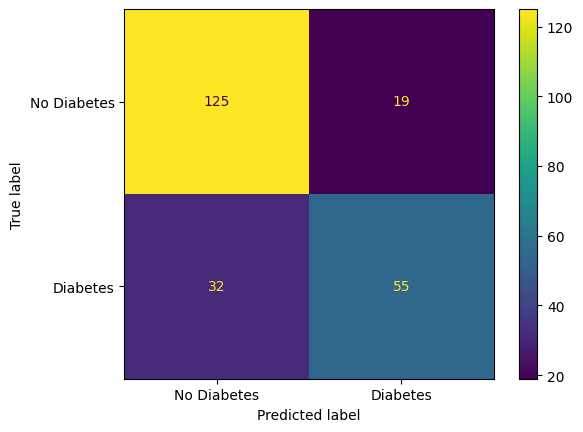

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# After prediction
print(classification_report(y_test, predict_test_data))

# Visual Confusion Matrix
cm = confusion_matrix(y_test, predict_test_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot()

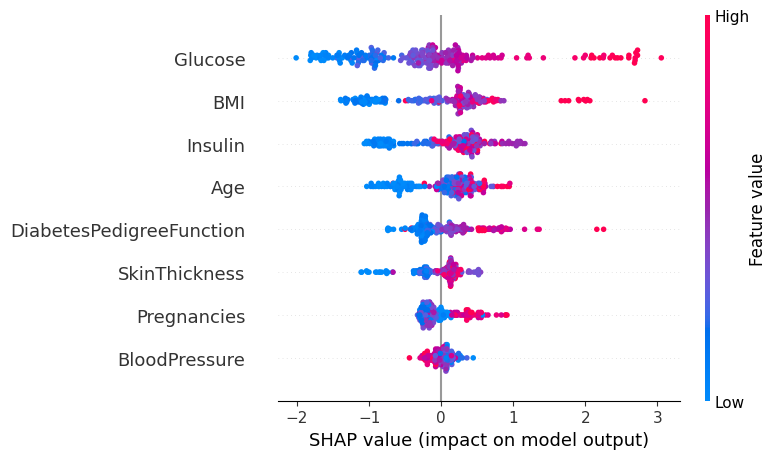

In [67]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(gb_model) # or your random_search.best_estimator_
shap_values = explainer.shap_values(X_test_imputed)

# Plot summary
shap.summary_plot(shap_values, X_test_imputed, feature_names=feature_columns)

In [69]:
import joblib

best_model = random_search.best_estimator_

joblib.dump(best_model, 'diabetes_model.pkl')

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(knn_imputer, 'knn_imputer.pkl')

print("All .pkl files have been updated successfully!")

All .pkl files have been updated successfully!
